<img width="100%" src ='https://images.unsplash.com/photo-1445205170230-053b83016050?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MzIzfHxmYXNoaW9uJTIwY29uc3VtJTIwd2lkZXxlbnwwfDB8MHx8fDI%3D'>

---

<h1 style="color:Purple;">Projeto Final: Desigualdade no Consumo de Moda no Brasil</h1>

<h2 style="color:Teal;">Sobre o Projeto</h2>

Escolhi desenvolver este projeto com foco no setor de moda por já atuar profissionalmente nessa área e vivenciar de perto as transformações no comportamento do consumidor, os desafios de acessibilidade e as tendências de consumo consciente. O objetivo foi unir minha experiência prática com os conhecimentos adquiridos ao longo do curso, utilizando ciência de dados para gerar insights relevantes e aplicáveis ao setor.

A base de dados utilizada foi inspirada na **Pesquisa de Orçamentos Familiares (POF) 2017-2018**, realizada pelo **IBGE**, que é a **mais recente disponível** com informações detalhadas sobre o consumo das famílias brasileiras, incluindo gastos com vestuário. Apesar de não refletir o cenário pós-pandemia, a POF continua sendo uma importante fonte de dados para analisar padrões estruturais de consumo no Brasil, e por isso foi utilizada como referência neste trabalho.

Este projeto busca, portanto, explorar **como o consumo de moda varia entre diferentes faixas de renda, regiões, idades e gêneros**, e o que isso revela sobre a **desigualdade no acesso à moda** no país.

<h2 style="color:Teal;">Problema</h2>
Como o consumo de vestuário varia entre faixas de renda, regiões, gênero e idade no Brasil?

<h2 style="color:Teal;">Objetivo</h2>
Analisar padrões de gasto com vestuário no Brasil usando dados simulados com base na POF.

<h2 style="color:Gray;">Metodologia (CRISP-DM)</h2>
- Entendimento do problema
- Coleta e preparação dos dados (simulados)
- Análise exploratória
- Modelagem (Clusterização e Regressão Linear)
- Avaliação dos modelos
- Comunicação dos resultados

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Carregando os dados
df = pd.read_csv('base_consumo_moda.csv')
df.head()

,Região,Gênero,Faixa de Renda,Faixa Etária,Gasto Mensal com Vestuário (R$)
0,Sudeste,Masculino,1 a 2 SM,Até 17 anos,102.45
1,Sul,Masculino,1 a 2 SM,30 a 44 anos,139.47
2,Centro-Oeste,Masculino,1 a 2 SM,60 anos ou mais,92.42
3,Sul,Feminino,1 a 2 SM,45 a 59 anos,78.81
4,Sul,Feminino,5 a 10 SM,Até 17 anos,253.63


## Limpeza e Proteção de Dados
- Verificamos valores nulos e dados duplicados
- Os dados são anônimos e simulados, não contêm informações sensíveis

In [4]:
df.isnull().sum(), df.duplicated().sum()

(Região                             0
 Gênero                             0
 Faixa de Renda                     0
 Faixa Etária                       0
 Gasto Mensal com Vestuário (R$)    0
 dtype: int64,
 1)

## Análise Exploratória de Dados

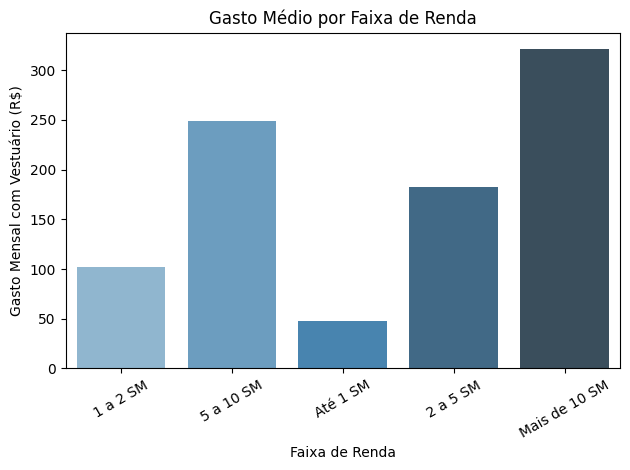

In [6]:
warnings.filterwarnings("ignore", message="tzname SM identified but not understood")

sns.barplot(data=df, x='Faixa de Renda', y='Gasto Mensal com Vestuário (R$)', errorbar=None, palette='Blues_d', legend=False)

plt.title('Gasto Médio por Faixa de Renda')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

## Clusterização Hierárquica

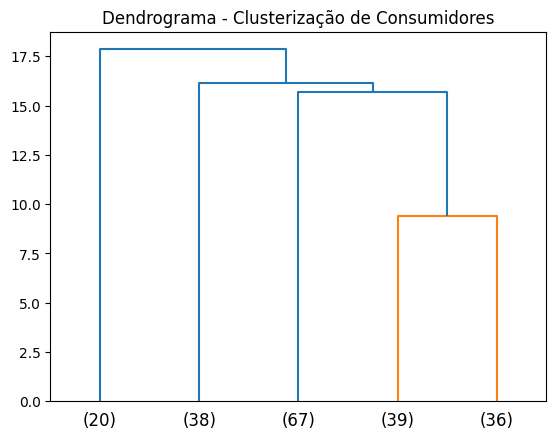

,Gasto Mensal com Vestuário (R$)
Cluster,
1,321.65
2,47.83
3,170.98
4,146.04


In [8]:
df_cluster = df.copy()
df_cluster['Renda_Num'] = LabelEncoder().fit_transform(df_cluster['Faixa de Renda'])
df_cluster['Idade_Num'] = LabelEncoder().fit_transform(df_cluster['Faixa Etária'])
X = df_cluster[['Gasto Mensal com Vestuário (R$)', 'Renda_Num', 'Idade_Num']]
X_scaled = StandardScaler().fit_transform(X)
Z = linkage(X_scaled, method='ward')
dendrogram(Z, truncate_mode='lastp', p=5)
plt.title('Dendrograma - Clusterização de Consumidores')
plt.show()
df_cluster['Cluster'] = fcluster(Z, t=4, criterion='maxclust')
df_cluster.groupby('Cluster')[['Gasto Mensal com Vestuário (R$)']].mean().round(2)

## Regressão Linear - Prevendo Gasto com Vestuário

In [10]:
df_reg = pd.get_dummies(df, columns=['Região', 'Gênero', 'Faixa de Renda', 'Faixa Etária'], drop_first=True)
X = df_reg.drop(columns=['Gasto Mensal com Vestuário (R$)'])
y = df_reg['Gasto Mensal com Vestuário (R$)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MSE: 326.70
R²: 0.96


## Conclusão
- O projeto evidenciou desigualdade no consumo de moda no Brasil.
- A renda foi o principal fator determinante no gasto com vestuário.
- A clusterização mostrou perfis distintos de consumidores.
- A regressão linear apresentou R² de 0.96, indicando ótimo poder preditivo.
- Essa análise pode apoiar marcas, brechós e políticas públicas voltadas à moda acessível e sustentável.